# Tarea Triángulo de Sierpinski
### Sergio Adrian Martínez Tena

#### Librerias Necesarias

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.spatial
import math
from matplotlib import cm

#### Funciones Necesarias

In [2]:
# Calcular distancia euclidiana de un punto rectangular a otro
def euclidianDistance(point1, point2):
    d = (point1[0]-point2[0])**2 + (point1[1]-point2[1])**2
    return np.sqrt(d)

# Calcular distancia manhatan de un punto rectangular a otro
def manhattanDistance(point1, point2):
    d = sum(abs(val1-val2) for val1, val2 in zip(point1,point2))
    return d

# Calcular distancia minkowski de un punto rectangular a otro
def minkowskiDistance(point1, point2):
    d = scipy.spatial.distance.minkowski(point1, point2)
    return d

# Calcular distancia chebyshev de un punto rectangular a otro
def chebyshevDistance(point1, point2):
    d = scipy.spatial.distance.chebyshev(point1, point2)
    return d

# Hace un triangulo equilatero
def triangle(point,perimeter):
    points = [point]
    a = perimeter/3
    h = np.sqrt(a**2-(a/2)**2)
    points.append([point[0]-a/2,point[1]-h])
    points.append([point[0]+a/2,point[1]-h])
    return points

def getMiddlePoint(p1,p2):
    return [(p1[0]+p2[0])/2,(p1[1]+p2[1])/2]

# Crea los puntos del triangulo de sierpinski de manera iterativa
def sierpinski(n, triangle):
    points = triangle.copy()
    iterations = [ 1 for _ in points]
    triangles = [triangle.copy()]
    for i in range(1,n):
        newTriangles = []
        for t in triangles:
            p1,p2,p3 = t
            p12 = getMiddlePoint(p1,p2)
            points.append(p12)
            iterations.append(i+1)
            p13 = getMiddlePoint(p1,p3)
            points.append(p13)
            iterations.append(i+1)
            p23 = getMiddlePoint(p2,p3)
            points.append(p23)
            iterations.append(i+1)
            newTriangles.append([p1,p12,p13])
            newTriangles.append([p12,p2,p23])
            newTriangles.append([p13,p23,p3])
        triangles = newTriangles.copy()
    
    return pd.DataFrame({'x':[point[0] for point in points],
                         'y':[point[1] for point in points], 
                         'iteration':iterations})

def expectedDistance(points):
    
    dataset = points.copy()
    
    expectedListEucli = []
    maxDistEucli = []
    minDistEucli = []
    
    expectedListManha = []
    maxDistManha = []
    minDistManha = []
    
    expectedListMinko = []
    maxDistMinko = []
    minDistMinko = []
    
    expectedListCheby = []
    maxDistCheby = []
    minDistCheby = []
    
    listPoints = [list(point) for point in points.iloc[:,:2].values]
    n = len(listPoints)
    
    # Hace una iterecion tomando referencia sobre cada punto
    for i,refPoint in enumerate(listPoints):
        distEucli = []
        distManha = []
        distMinko = []
        distCheby = []
        
        # Se suma la distancia del punto de referencia
        # a cada uno de los de los puntos restantes
        for point in listPoints[:i]+listPoints[i+1:]:
            distEucli.append(euclidianDistance(refPoint, point))
            distManha.append(manhattanDistance(refPoint, point))
            distMinko.append(minkowskiDistance(refPoint, point))
            distCheby.append(chebyshevDistance(refPoint, point))

        maxDistEucli.append(max(distEucli))
        minDistEucli.append(min(distEucli))
        maxDistManha.append(max(distManha))
        minDistManha.append(min(distManha))
        maxDistMinko.append(max(distMinko))
        minDistMinko.append(min(distMinko))
        maxDistCheby.append(max(distCheby))
        minDistCheby.append(min(distCheby))

        expectedListEucli.append(sum(distEucli)/n)
        expectedListManha.append(sum(distManha)/n)
        expectedListMinko.append(sum(distMinko)/n)
        expectedListCheby.append(sum(distCheby)/n)
        
    dataset['D. Esperada Euclidiana'] = expectedListEucli
    dataset['D. Maxima Euclidiana'] = maxDistEucli
    dataset['D. Minima Euclidiana'] = minDistEucli
    
    dataset['D. Esperada Manhatan'] = expectedListManha
    dataset['D. Maxima Manhatan'] = maxDistManha
    dataset['D. Minima Manhatan'] = minDistManha
    
    dataset['D. Esperada Minkowski'] = expectedListMinko
    dataset['D. Maxima Minkowski'] = maxDistMinko
    dataset['D. Minima Minkowski'] = minDistMinko
    
    dataset['D. Esperada Chebyshev'] = expectedListCheby
    dataset['D. Maxima Chebyshev'] = maxDistCheby
    dataset['D. Minima Chebyshev'] = minDistCheby

    return dataset

#### Cálculo de puntos

In [20]:
initialTriangle = triangle([0,20],72)
points = sierpinski(7,initialTriangle)
dataset = expectedDistance(points)
dataset

,x,y,iteration,D. Esperada Euclidiana,D. Maxima Euclidiana,D. Minima Euclidiana,D. Esperada Manhatan,D. Maxima Manhatan,D. Minima Manhatan,D. Esperada Minkowski,D. Maxima Minkowski,D. Minima Minkowski,D. Esperada Chebyshev,D. Maxima Chebyshev,D. Minima Chebyshev
0,0.0,20.000000,1,14.914494,24.000000,3.0,18.784978,32.784610,4.098076,14.914494,24.000000,3.0,13.856406,20.784610,2.598076
1,-12.0,-0.784610,1,14.914494,24.000000,3.0,18.928203,32.784610,3.000000,14.914494,24.000000,3.0,13.251693,24.000000,2.598076
2,12.0,-0.784610,1,14.914494,24.000000,3.0,18.928203,32.784610,3.000000,14.914494,24.000000,3.0,13.251693,24.000000,2.598076
3,-6.0,9.607695,2,9.916325,20.784610,3.0,12.867031,28.392305,3.000000,9.916325,20.784610,3.0,8.782966,18.000000,2.598076
4,6.0,9.607695,2,9.916325,20.784610,3.0,12.867031,28.392305,3.000000,9.916325,20.784610,3.0,8.782966,18.000000,2.598076
5,0.0,-0.784610,2,9.916325,20.784610,3.0,11.856775,20.784610,3.000000,9.916325,20.784610,3.0,9.276464,20.784610,2.598076
6,-3.0,14.803848,3,11.206045,21.633308,3.0,14.583697,30.588457,3.000000,11.206045,21.633308,3.0,9.801234,15.588457,2.598076
7,3.0,14.803848,3,11.206045,21.633308,3.0,14.583697,30.588457,3.000000,11.206045,21.633308,3.0,9.801234,15.588457,2.598076
8,0.0,9.607695,3,8.326488,15.874508,3.0,10.867031,22.392305,3.000000,8.326488,15.874508,3.0,7.206409,12.000000,2.598076
9,-9.0,4.411543,3,11.206045,21.633308,3.0,14.163002,26.196152,3.000000,11.206045,21.633308,3.0,10.143360,21.000000,2.598076


### Orden de aparición

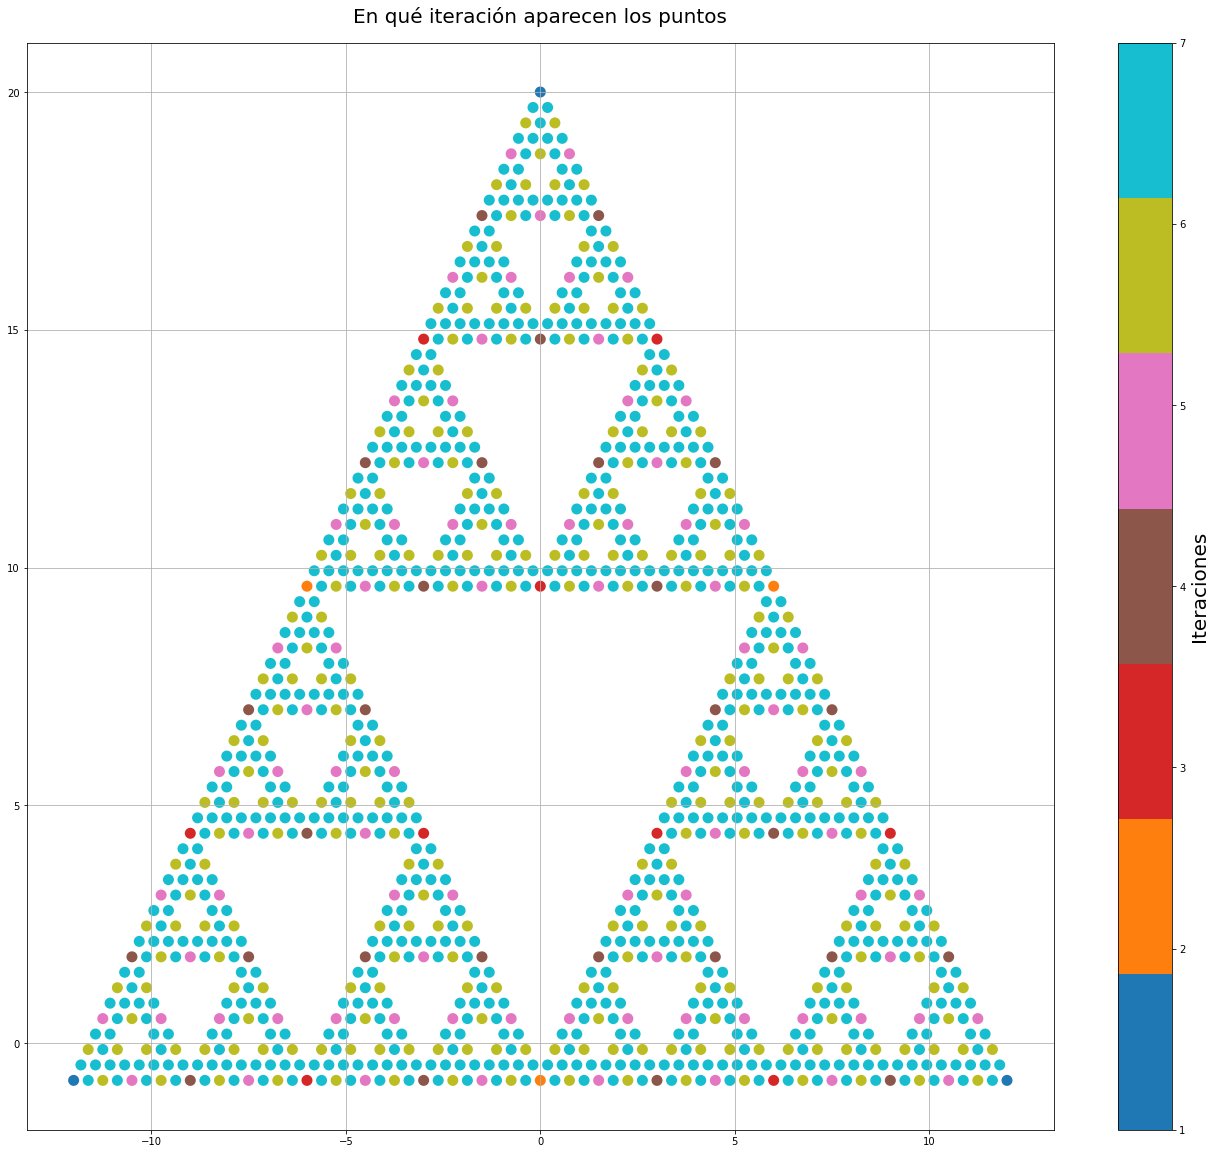

In [12]:
plt.figure(figsize=(23,20))
cmap = plt.get_cmap('tab10', 7)
plt.scatter(x=dataset['x'],y=dataset['y'], linewidths=5, c=dataset['iteration'], cmap=cmap);
c = plt.colorbar();
c.set_label("Iteraciones",fontsize=20)
plt.title("En qué iteración aparecen los puntos",fontsize=20,pad=20);
plt.grid(True)

### Graficas con código de color

/var/folders/jp/10my5v9d6dl9nk7f_t7g56840000gn/T/ipykernel_3025/2497823453.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))


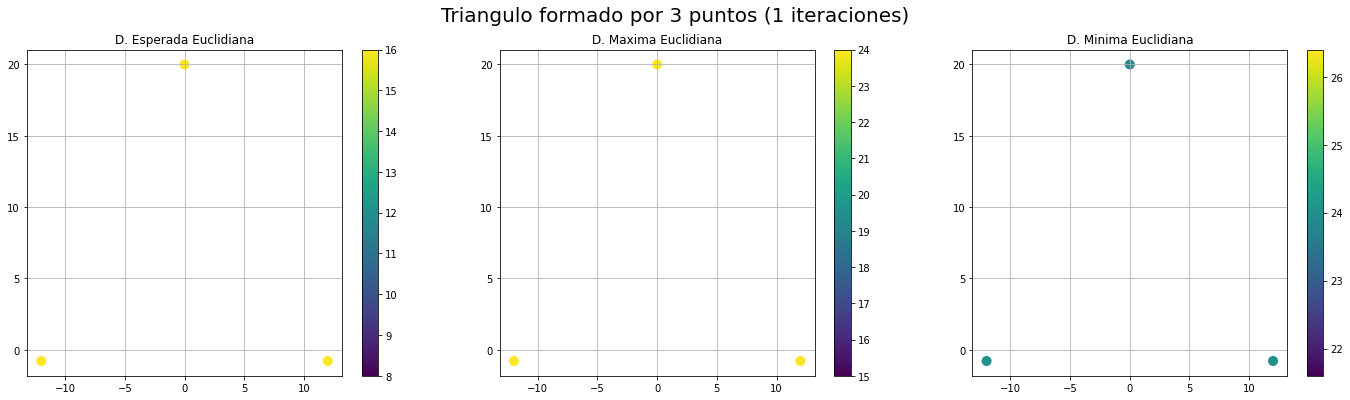

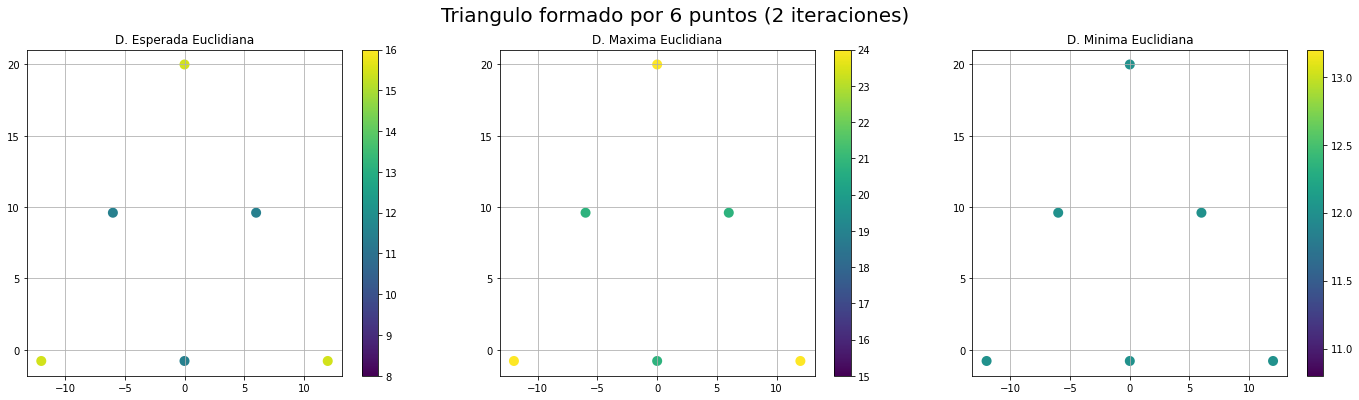

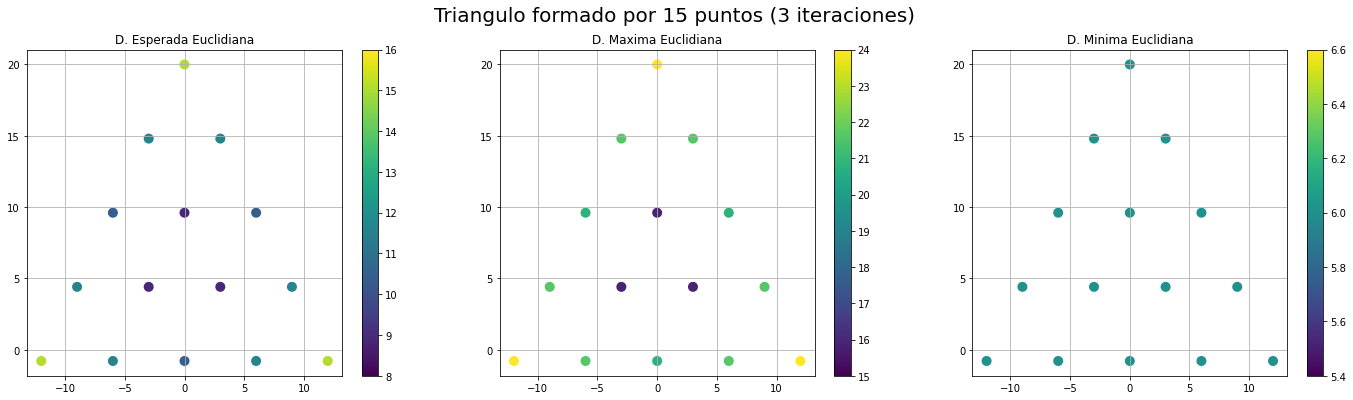

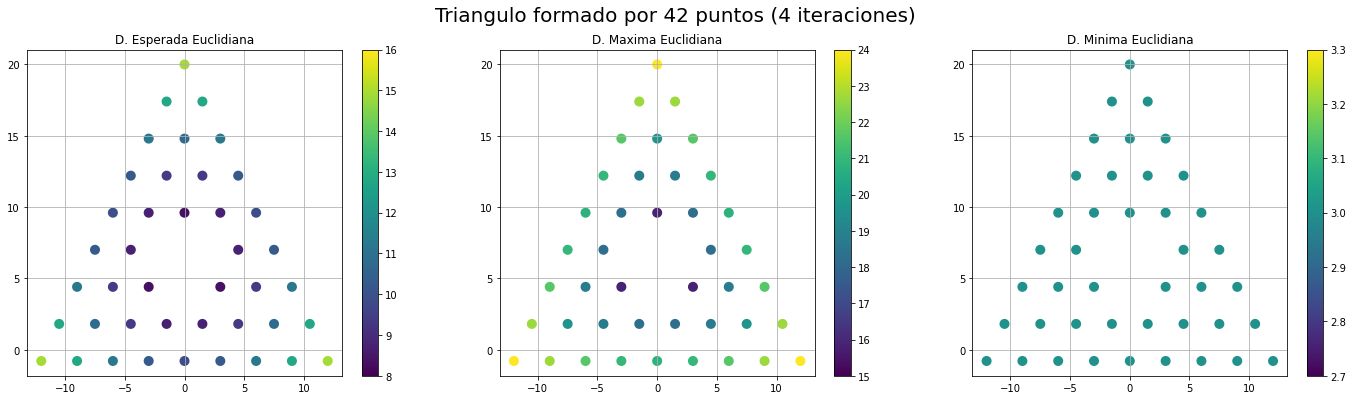

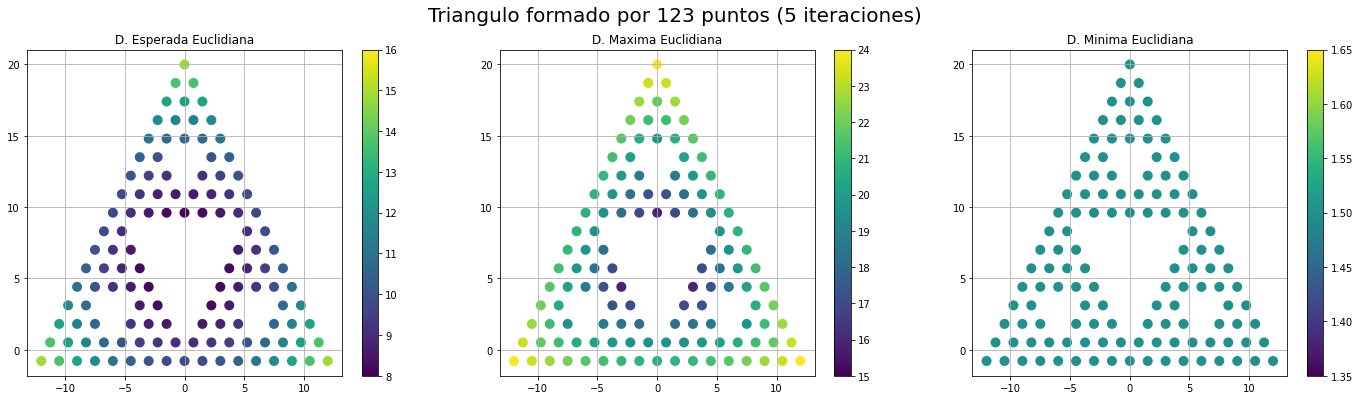

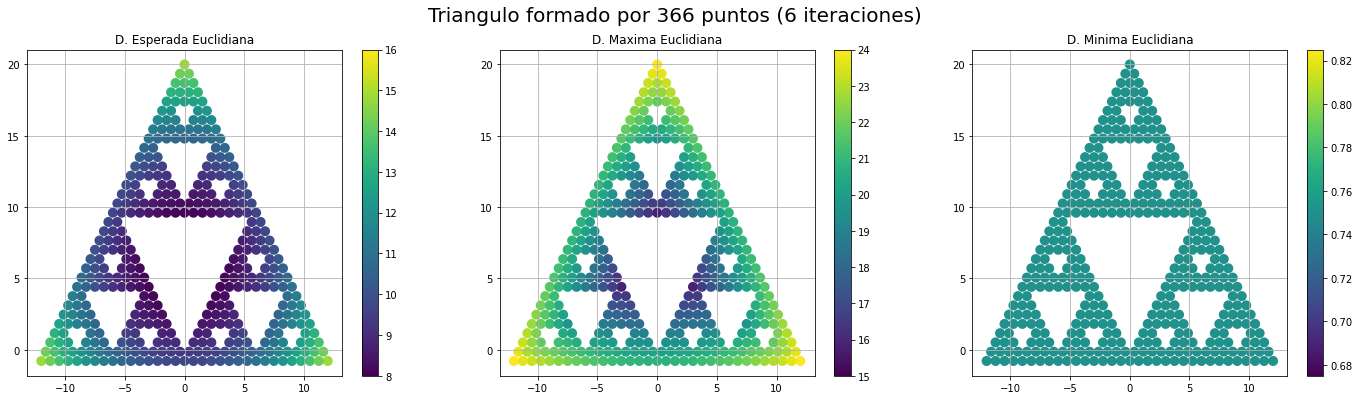

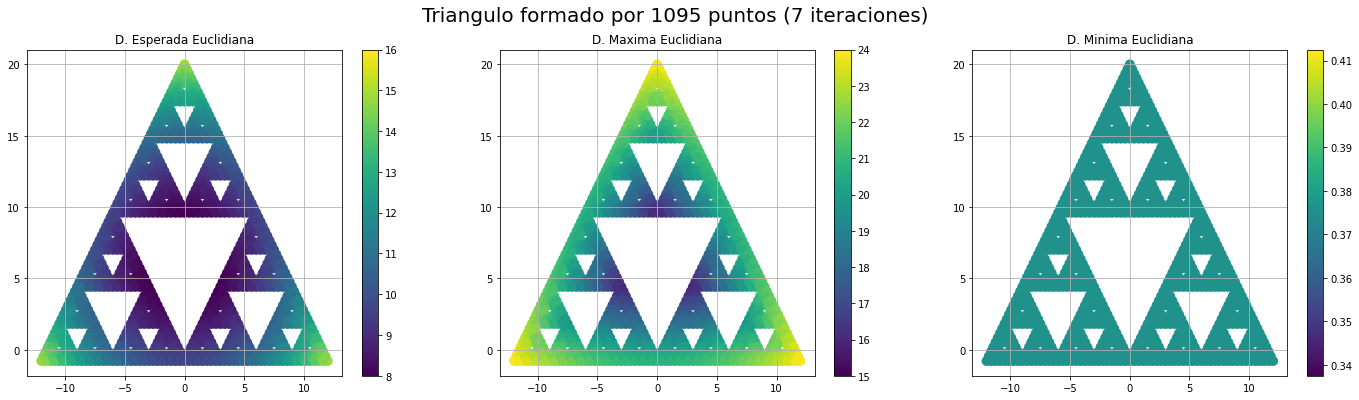

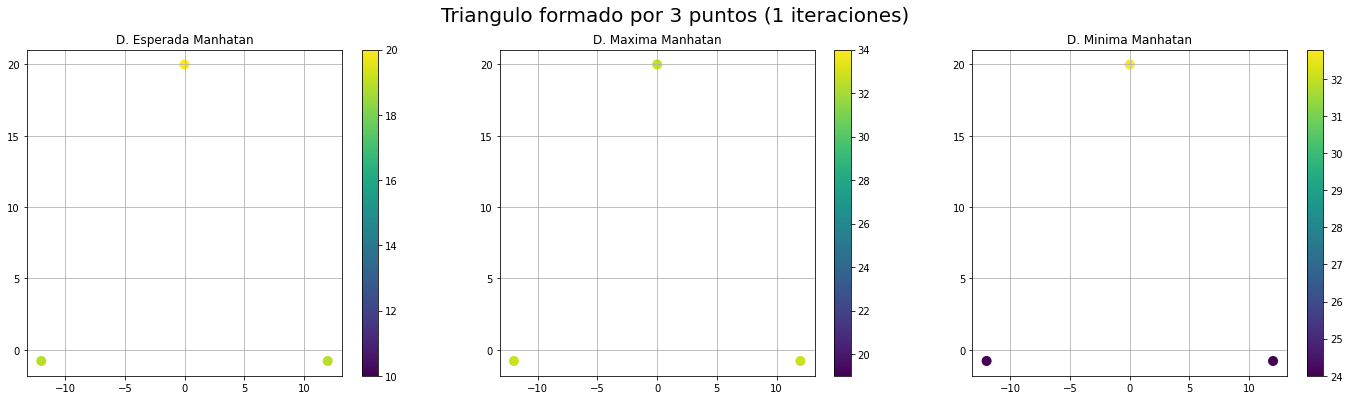

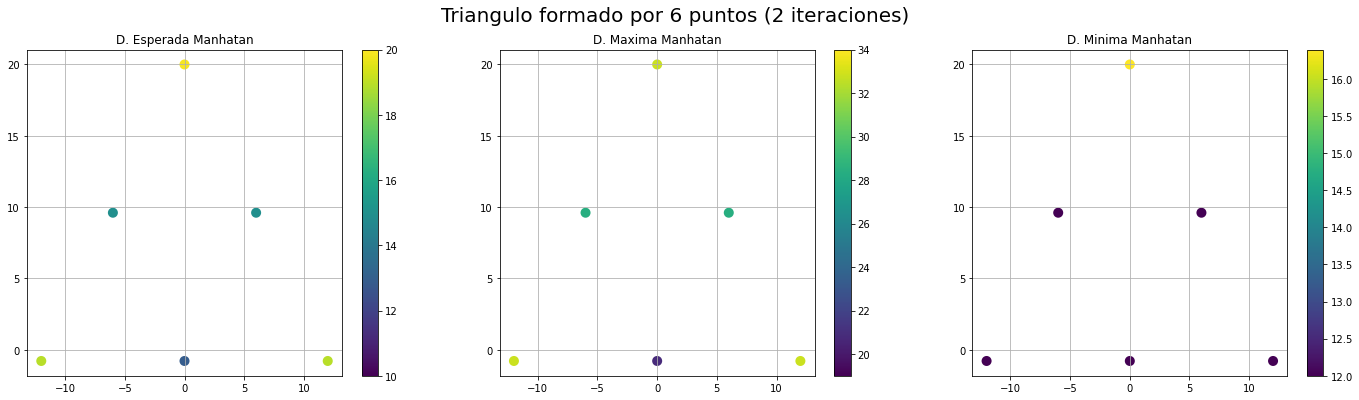

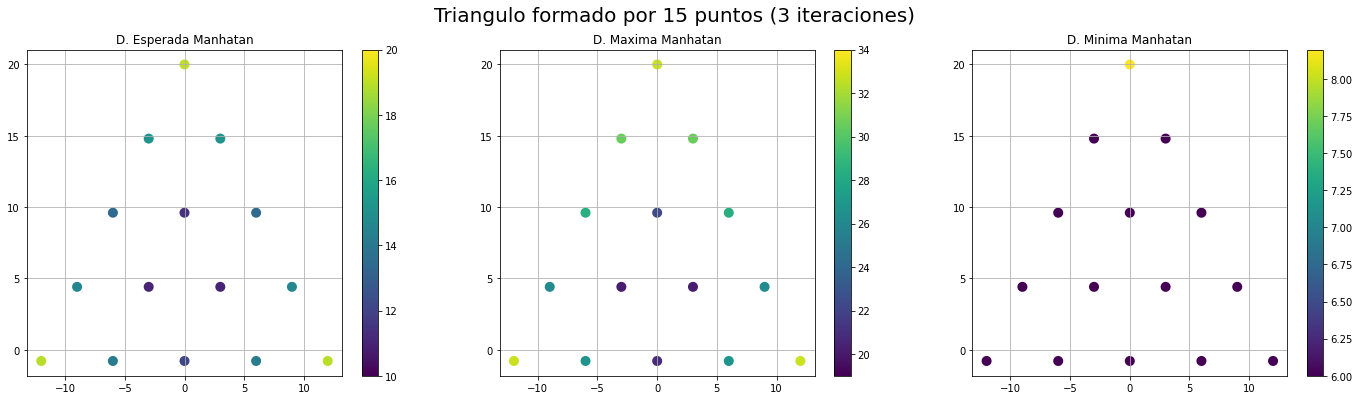

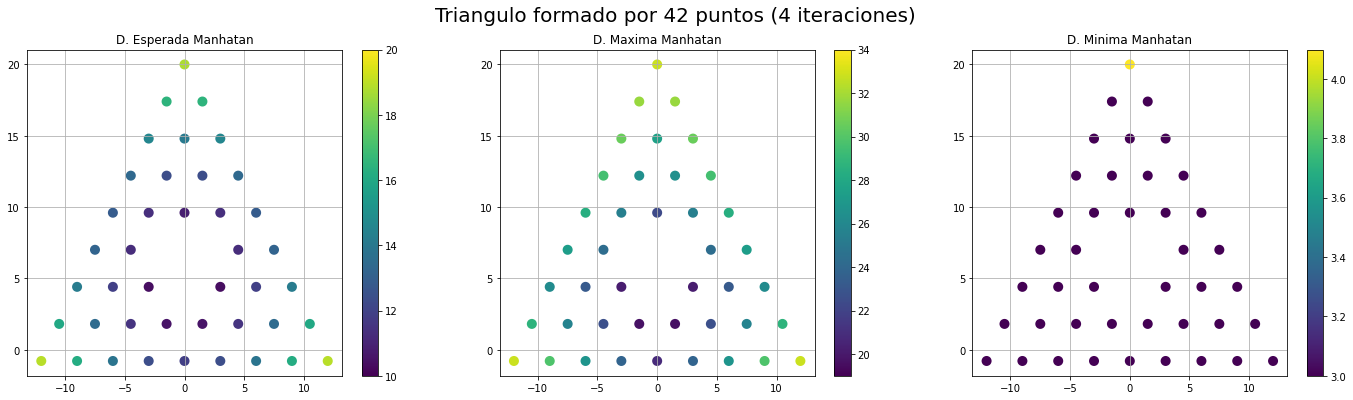

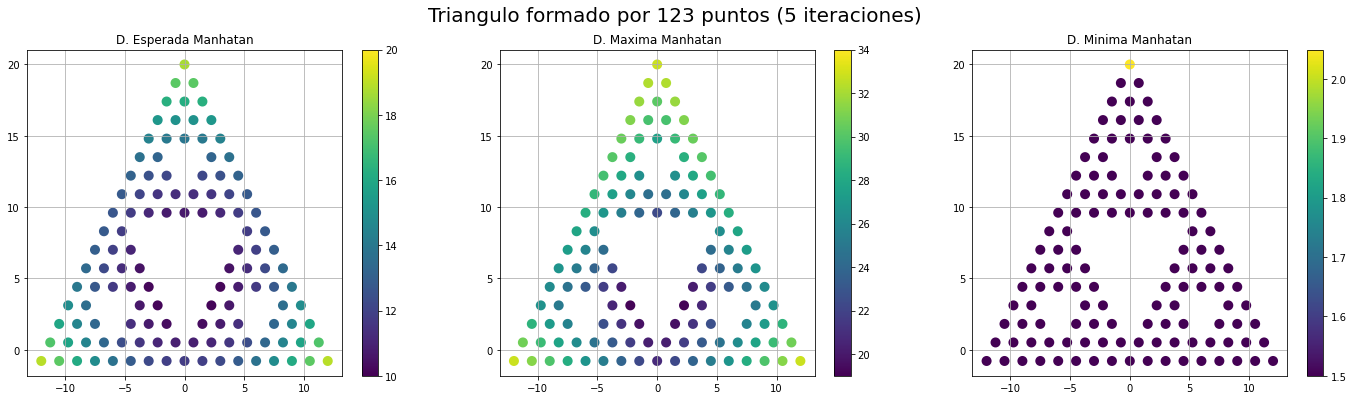

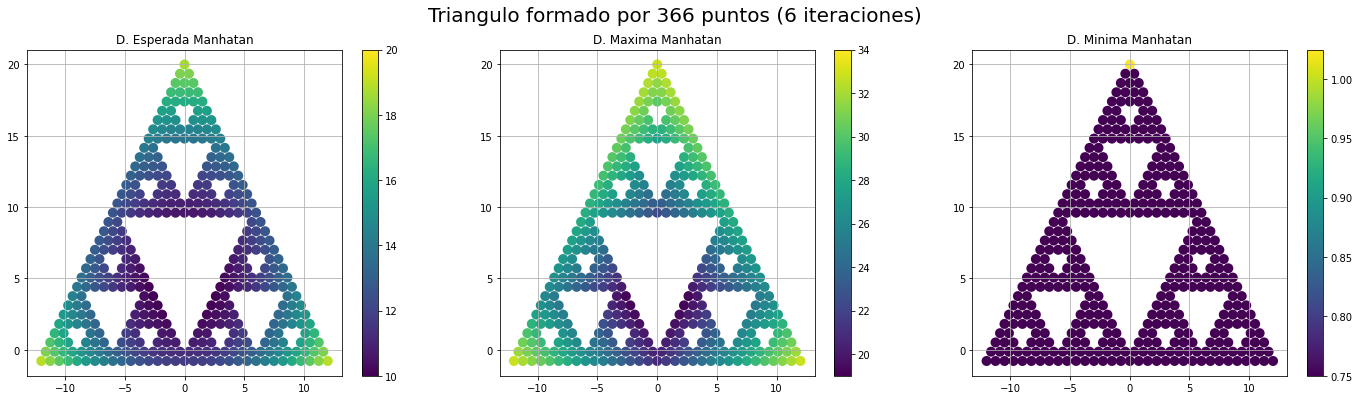

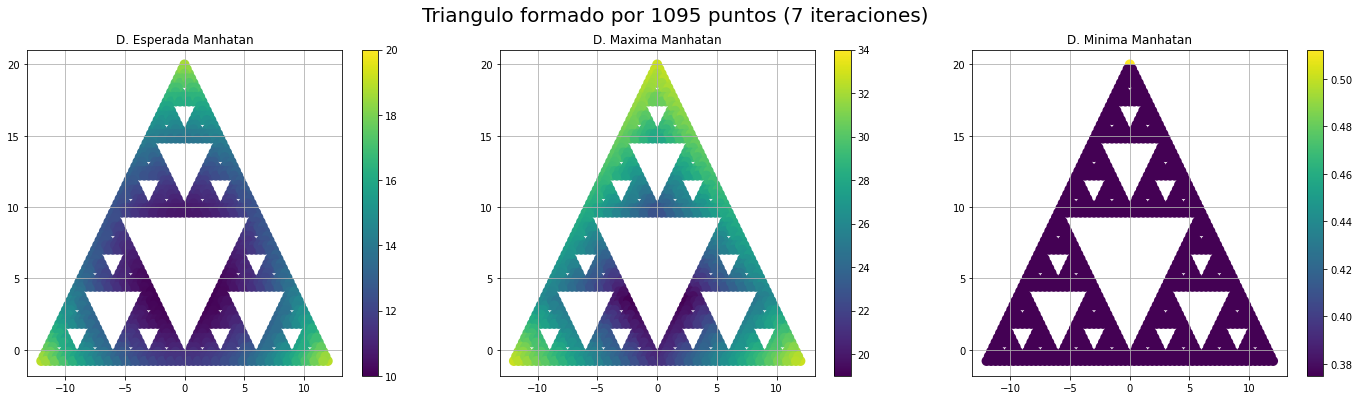

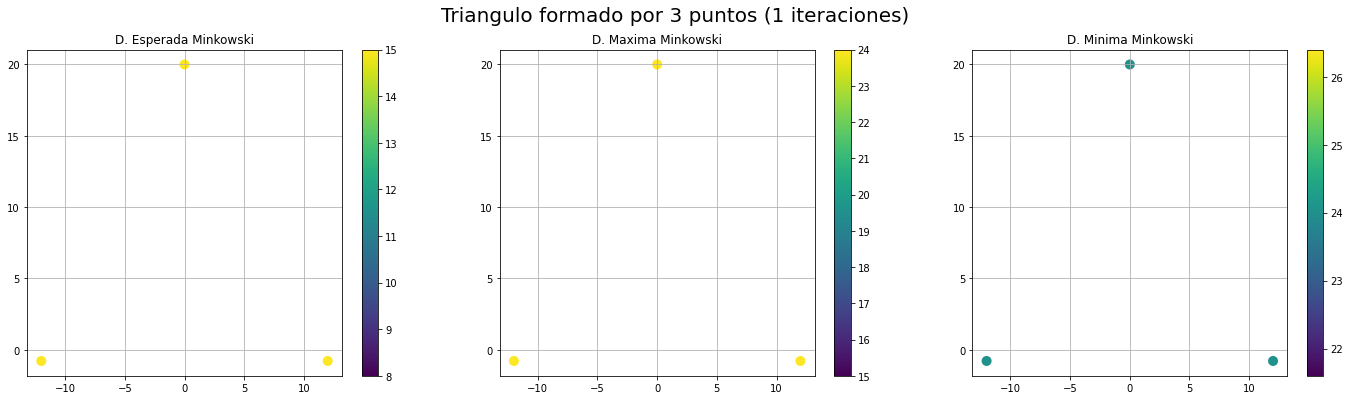

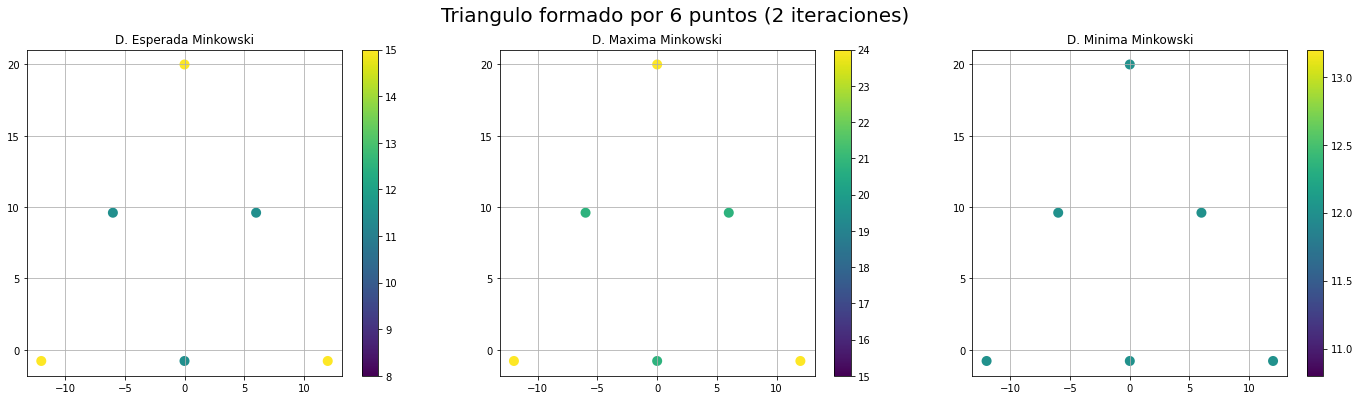

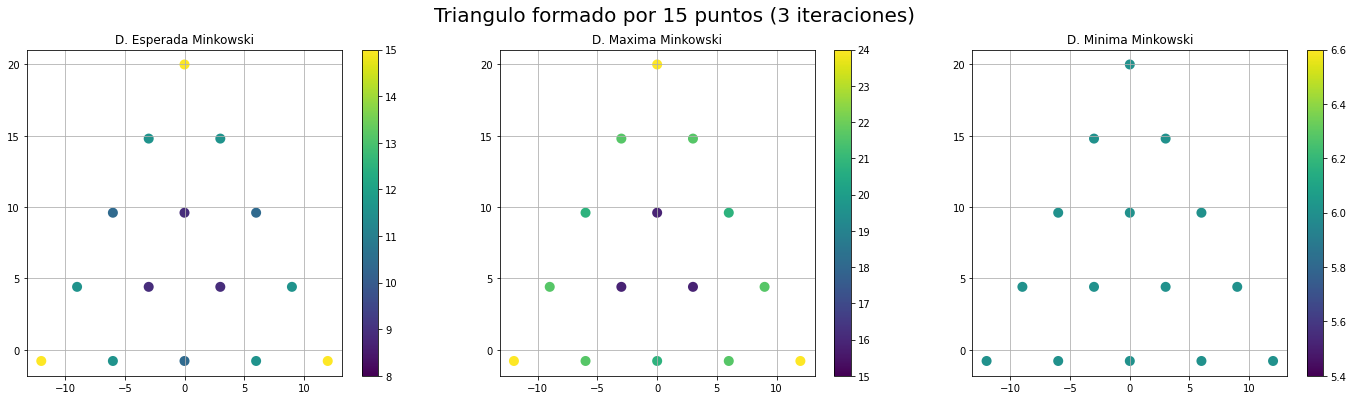

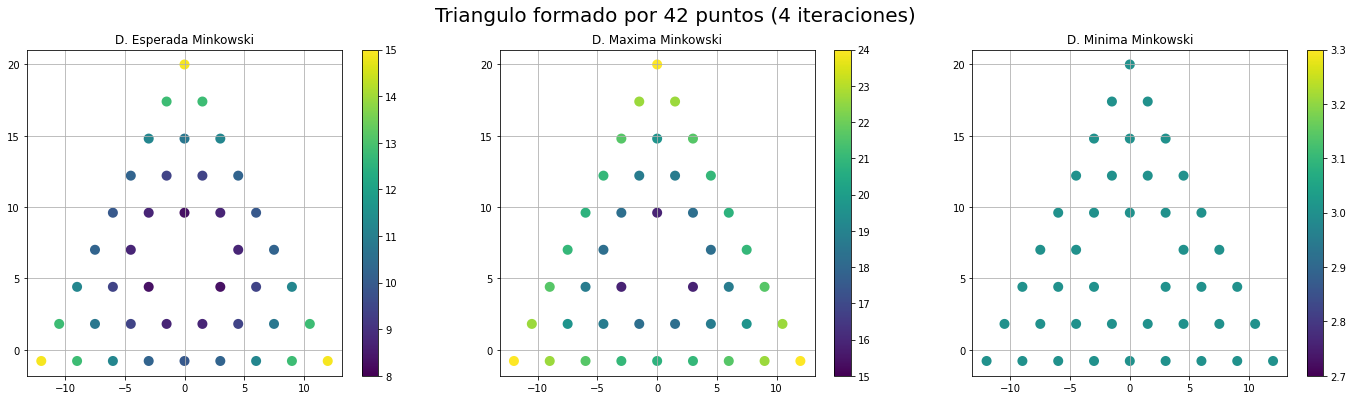

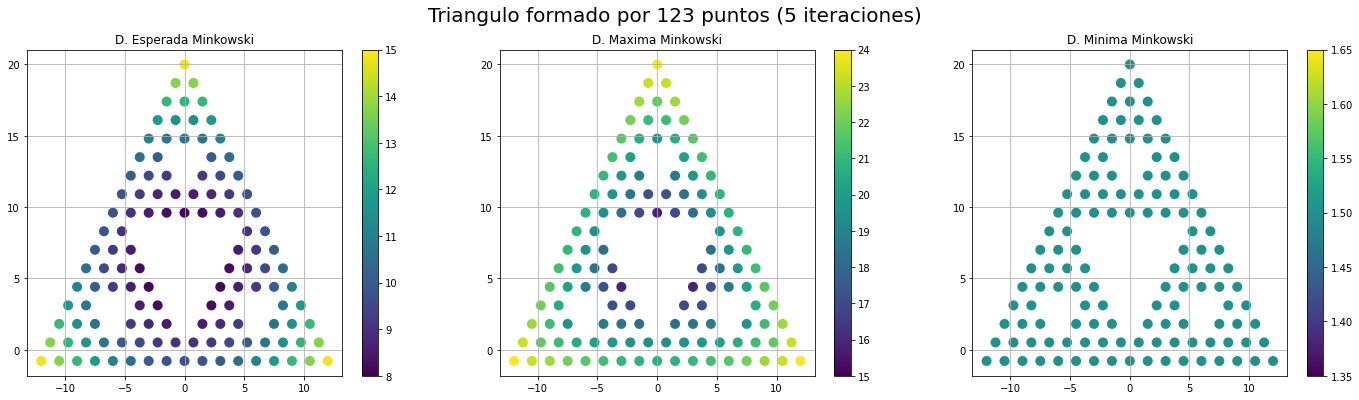

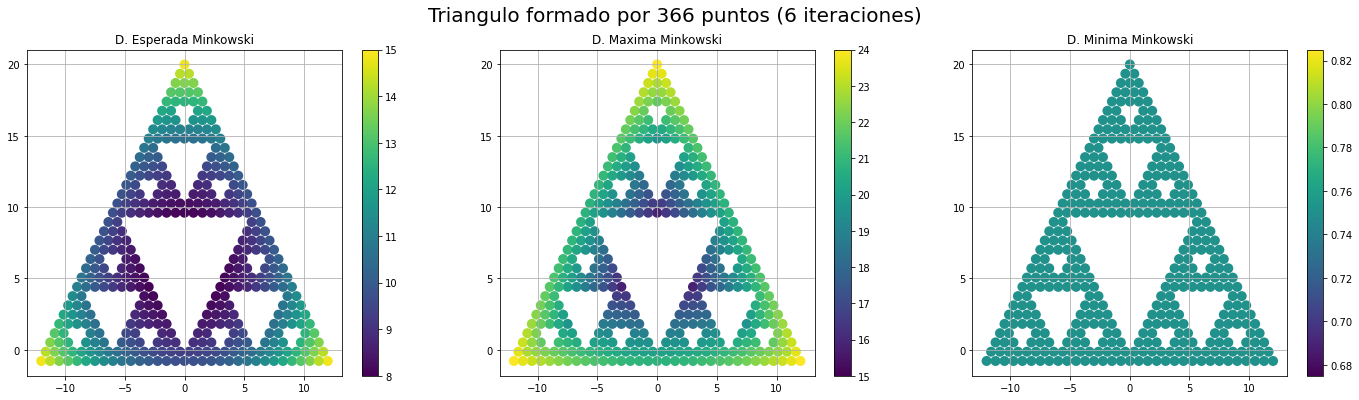

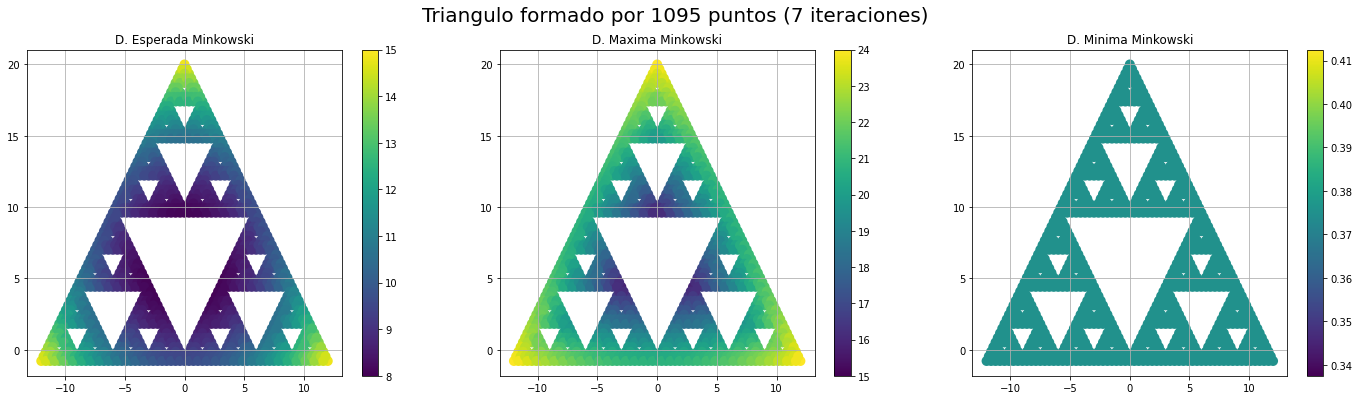

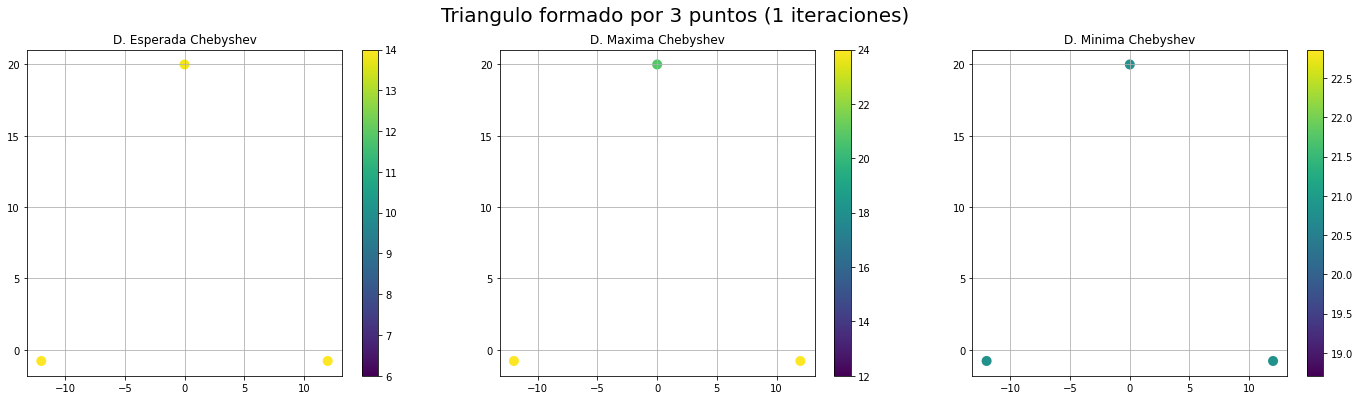

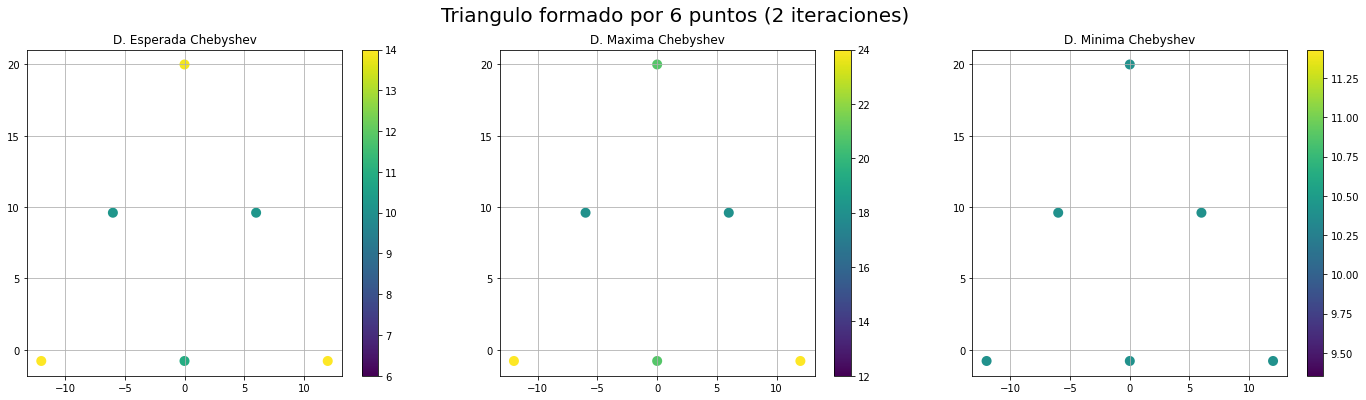

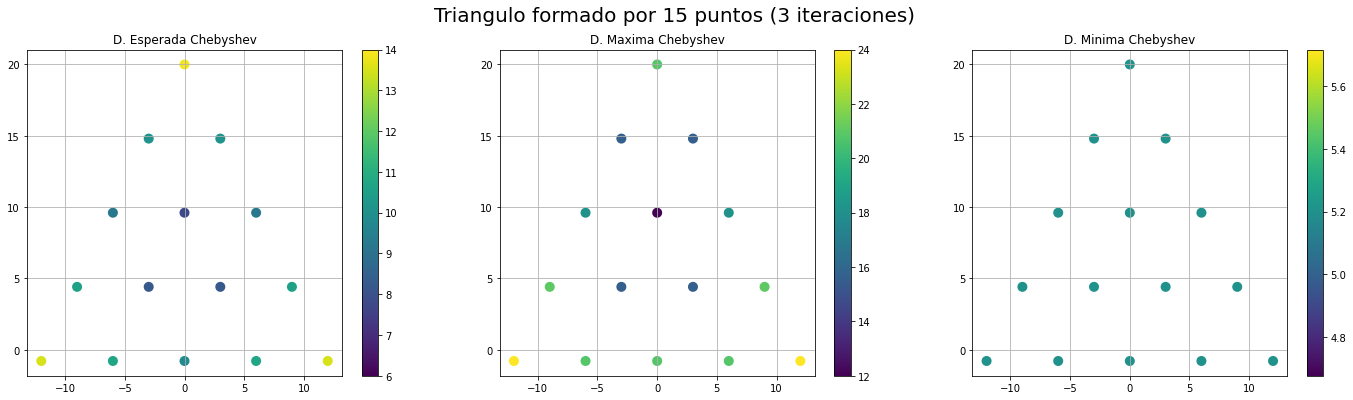

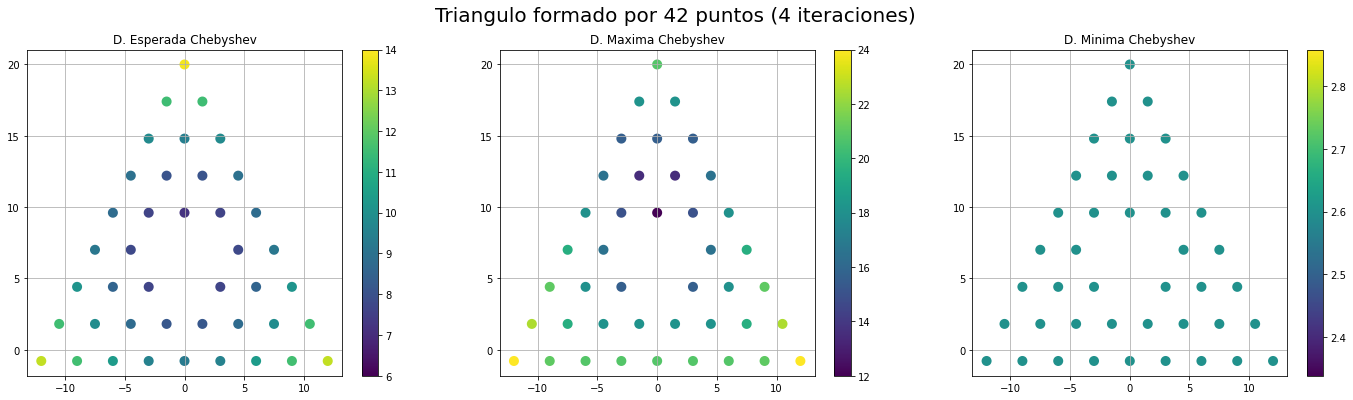

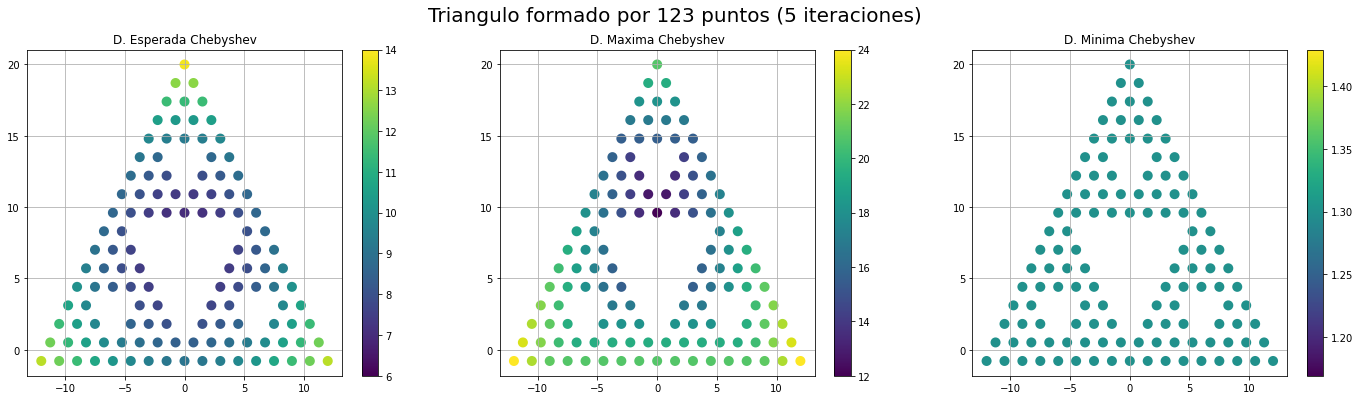

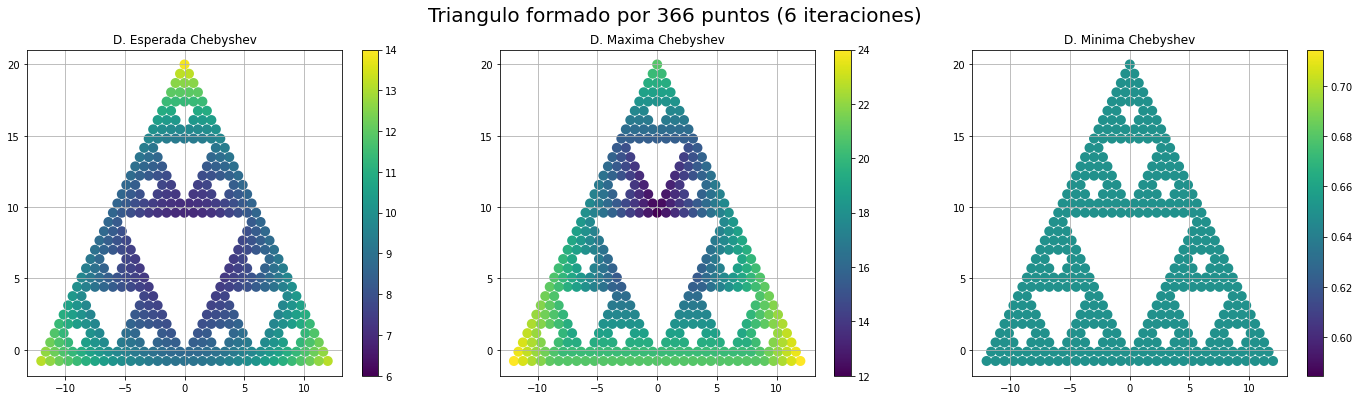

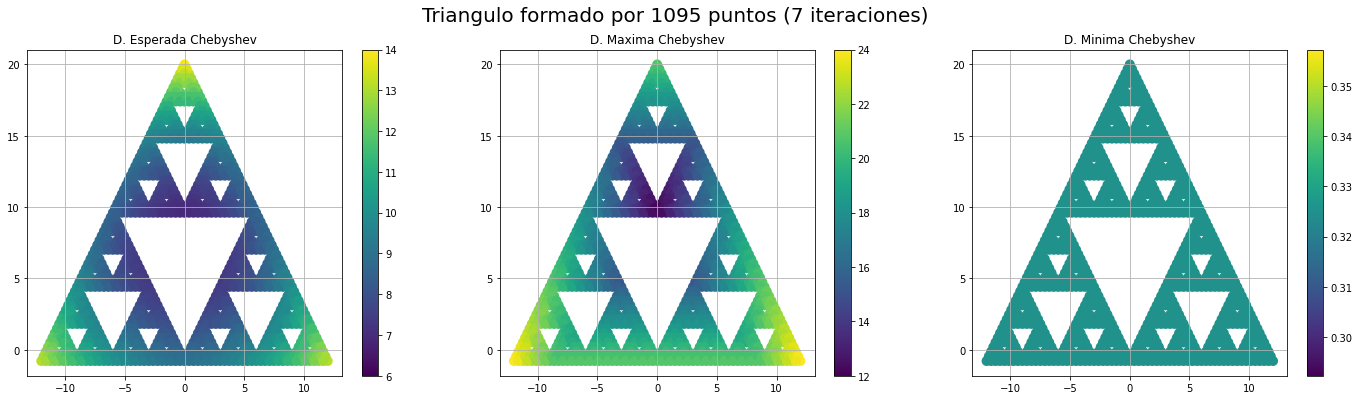

In [7]:
eucliLimits = [[8,16],[15,24],[]]
manhaLimits = [[10,20],[19,34],[]]
minkoLimits = [[8,15],[15,24],[]]
chebyLimits = [[6,14],[12,24],[]]

for metric,limits in zip(['Euclidiana', 'Manhatan', 'Minkowski', 'Chebyshev'],[eucliLimits,manhaLimits,minkoLimits,chebyLimits]):
    for i in [1,2,3,4,5,6,7]:
        points = sierpinski(i,initialTriangle)
        dataset = expectedDistance(points)
        features = [f for f in dataset.columns[3:]]

        metricFeature = [f for f in features if metric in f]
        
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
        fig.suptitle(f'Triangulo formado por {dataset.shape[0]} puntos ({i} iteraciones)', fontsize=20)
        
        for col in range(3):
            ax = axes[col]
            s = ax.scatter(x=dataset['x'],y=dataset['y'], linewidths=4, c=dataset[metricFeature[col]], cmap='viridis')
            c = fig.colorbar(s,ax=ax)
            if len(limits[col]) == 2:
                vmin,vmax = limits[col]
                s.set_clim(vmin,vmax)
            ax.grid(True)
            ax.set_title(metricFeature[col])
